[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stefmolin/pandas-workshop/main?urlpath=lab/tree/notebooks/2-data_wrangling.ipynb) [![View slides in browser](https://img.shields.io/badge/view-slides-orange?logo=reveal.js&logoColor=white)](https://stefmolin.github.io/pandas-workshop/slides/html/workshop.slides.html#/section-2)

---



# Section 2: Data Wrangling

To prepare our data for analysis, we need to perform data wrangling. In this section, we will learn how to clean and reformat data (e.g., renaming columns and fixing data type mismatches), restructure/reshape it, and enrich it (e.g., discretizing columns, calculating aggregations, and combining data sources).

## Data cleaning

In this section, we will take a look at creating, renaming, and dropping columns; type conversion; and sorting &ndash; all of which make our analysis easier. We will be working with the 2019 Yellow Taxi Trip Data provided by NYC Open Data.

In [1]:
import pandas as pd

taxis = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Source: [NYC Open Data](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp) collected via [SODA](https://dev.socrata.com/foundry/data.cityofnewyork.us/2upf-qytp).*

### Dropping columns
Let's start by dropping the ID columns and the `store_and_fwd_flag` column, which we won't be using.

In [2]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag', regex=True)
columns_to_drop = taxis.columns[mask]
columns_to_drop

Index(['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
       'dolocationid'],
      dtype='object')

In [3]:
taxis = taxis.drop(columns=columns_to_drop)
taxis.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Tip: Another way to do this is to select the columns we want to keep: `taxis.loc[:,~mask]`.*

### Renaming columns

Next, let's rename the datetime columns:

In [4]:
taxis = taxis.rename(
    columns={
        'tpep_pickup_datetime': 'pickup', 
        'tpep_dropoff_datetime': 'dropoff'
    }
)
taxis.columns

Index(['pickup', 'dropoff', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')

### Type conversion

Notice anything off with the data types?

In [5]:
taxis.dtypes

pickup                    object
dropoff                   object
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Both `pickup` and `dropoff` should be stored as datetimes. Let's fix this:

In [6]:
taxis[['pickup', 'dropoff']] = \
    taxis[['pickup', 'dropoff']].apply(pd.to_datetime)
taxis.dtypes

pickup                   datetime64[ns]
dropoff                  datetime64[ns]
passenger_count                   int64
trip_distance                   float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

*Tip: There are other ways to perform type conversion. For numeric values, we can use the `pd.to_numeric()` function, and we will see the `astype()` method, which is a more generic method, a little later.*

### Creating new columns

Let's calculate the following for each row:

1. elapsed time of the trip
2. the tip percentage
3. the total taxes, tolls, fees, and surcharges
4. the average speed of the taxi

In [7]:
taxis = taxis.assign(
    elapsed_time=lambda x: x.dropoff - x.pickup, # 1
    cost_before_tip=lambda x: x.total_amount - x.tip_amount,
    tip_pct=lambda x: x.tip_amount / x.cost_before_tip, # 2
    fees=lambda x: x.cost_before_tip - x.fare_amount, # 3
    avg_speed=lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 60 / 60
    ) # 4
)

*Tip: New to `lambda` functions? These small, anonymous functions can receive multiple arguments, but can only contain one expression (the return value). You will see these a lot in pandas code. Read more about them [here](https://realpython.com/python-lambda/).*

Our new columns get added to the right:

In [8]:
taxis.head(2)

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.1999,10.42,13.804642
1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.0000,1.80,9.022556


Some things to note:
- We used `lambda` functions to 1) avoid typing `taxis` repeatedly and 2) be able to access the `cost_before_tip` and `elapsed_time` columns in the same method that we create them.
- To create a single new column, we can also use `df['new_col'] = <values>`.

### Sorting by values

We can use the `sort_values()` method to sort based on any number of columns:

In [9]:
taxis.sort_values(['passenger_count', 'pickup'], ascending=[False, True]).head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
5997,2019-10-23 15:55:19,2019-10-23 16:08:25,6,1.58,2,10.0,1.0,0.5,0.0,0.0,0.3,14.3,2.5,0 days 00:13:06,14.3,0.000000,4.3,7.236641
443,2019-10-23 15:56:59,2019-10-23 16:04:33,6,1.46,2,7.5,1.0,0.5,0.0,0.0,0.3,11.8,2.5,0 days 00:07:34,11.8,0.000000,4.3,11.577093
8722,2019-10-23 15:57:33,2019-10-23 16:03:34,6,0.62,1,5.5,1.0,0.5,0.7,0.0,0.3,10.5,2.5,0 days 00:06:01,9.8,0.071429,4.3,6.182825
4198,2019-10-23 15:57:38,2019-10-23 16:05:07,6,1.18,1,7.0,1.0,0.5,1.0,0.0,0.3,12.3,2.5,0 days 00:07:29,11.3,0.088496,4.3,9.461024
8238,2019-10-23 15:58:31,2019-10-23 16:29:29,6,3.23,2,19.5,1.0,0.5,0.0,0.0,0.3,23.8,2.5,0 days 00:30:58,23.8,0.000000,4.3,6.258342


To pick out the largest/smallest rows, use `nlargest()` / `nsmallest()` instead. Looking at the 3 trips with the longest elapsed time, we see some possible data integrity issues:

In [10]:
taxis.nlargest(3, 'elapsed_time')

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
7576,2019-10-23 16:52:51,2019-10-24 16:51:44,1,3.75,1,17.5,1.0,0.5,0.0,0.0,0.3,21.8,2.5,0 days 23:58:53,21.8,0.0,4.3,0.156371
6902,2019-10-23 16:51:42,2019-10-24 16:50:22,1,11.19,2,39.5,1.0,0.5,0.0,0.0,0.3,41.3,0.0,0 days 23:58:40,41.3,0.0,1.8,0.466682
4975,2019-10-23 16:18:51,2019-10-24 16:17:30,1,0.70,2,7.0,1.0,0.5,0.0,0.0,0.3,11.3,2.5,0 days 23:58:39,11.3,0.0,4.3,0.029194


### [Exercise 2.1](./workbook.ipynb#Exercise-2.1)

##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [11]:
# Complete this exercise in the workbook.ipynb file
# Click on `Exercise 2.1` above to open the workbook.ipynb file

# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

## Working with the index

So far, we haven't really worked with the index because it's just been a row number; however, we can change the values we have in the index to access additional features of the pandas library.

### Setting and sorting the index

Currently, we have a RangeIndex, but we can switch to a DatetimeIndex by specifying a datetime column when calling `set_index()`:

In [12]:
taxis = taxis.set_index('pickup')
taxis.head(3)

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.199900,10.42,13.804642
2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.000000,1.80,9.022556
2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.8,2.5,0 days 00:12:27,13.80,0.144928,4.30,6.554217


Since we have a sample of the full dataset, let's sort the index to order by pickup time:

In [13]:
taxis = taxis.sort_index()

*Tip: `taxis.sort_index(axis=1)` will sort the columns by name. The `axis` parameter is present throughout the pandas library: `axis=0` targets rows and `axis=1` targets columns.*

We can now select ranges from our data based on the datetime the same way we did with row numbers:

In [14]:
taxis['2019-10-23 07:45':'2019-10-23 08']

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017


When not specifying a range, we use `loc[]`:

In [15]:
taxis.loc['2019-10-23 08']

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017


### Resetting the index

We will be working with time series later this section, but sometimes we want to reset our index to row numbers and restore the columns. We can make `pickup` a column again with the `reset_index()` method:

In [16]:
taxis = taxis.reset_index()
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.077220,1.8,15.265165
1,2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2,2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
3,2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017
4,2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.000000,1.8,11.193277


### [Exercise 2.2](./workbook.ipynb#Exercise-2.2)

##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [17]:
# Complete this exercise in the workbook.ipynb file

In [18]:
# Click on `Exercise 2.2` above to open the workbook.ipynb file

In [19]:
# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

## Reshaping data

The taxi dataset we have be working with is in a format conducive to an analysis. This isn't always the case. Let's now take a look at the TSA traveler throughput data, which compares 2021 throughput to the same day in 2020 and 2019:

In [20]:
tsa = pd.read_csv('../data/tsa_passenger_throughput.csv', parse_dates=['Date'])
tsa.head()

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,2021-05-14,1716561.0,250467,2664549
1,2021-05-13,1743515.0,234928,2611324
2,2021-05-12,1424664.0,176667,2343675
3,2021-05-11,1315493.0,163205,2191387
4,2021-05-10,1657722.0,215645,2512315


*Source: [TSA.gov](https://www.tsa.gov/coronavirus/passenger-throughput)*

First, we will lowercase the column names and take the first word (e.g., `2021` for `2021 Traveler Throughput`) to make this easier to work with:

In [21]:
tsa = tsa.rename(columns=lambda x: x.lower().split()[0])
tsa.head()

,date,2021,2020,2019
0,2021-05-14,1716561.0,250467,2664549
1,2021-05-13,1743515.0,234928,2611324
2,2021-05-12,1424664.0,176667,2343675
3,2021-05-11,1315493.0,163205,2191387
4,2021-05-10,1657722.0,215645,2512315


Now, we can work on reshaping it.

### Melting

Melting helps convert our data into long format. Now, we have all the traveler throughput numbers in a single column:

In [22]:
tsa_melted = tsa.melt(
    id_vars='date', # column that uniquely identifies a row (can be multiple)
    var_name='year', # name for the new column created by melting
    value_name='travelers' # name for new column containing values from melted columns
)
tsa_melted.sample(5, random_state=1) # show some random entries

,date,year,travelers
974,2020-09-12,2019,1879822.0
435,2021-03-05,2020,2198517.0
1029,2020-07-19,2019,2727355.0
680,2020-07-03,2020,718988.0
867,2020-12-28,2019,2500396.0


To convert this into a time series of traveler throughput, we need to replace the year in the `date` column with the one in the `year` column. Otherwise, we are marking prior years' numbers with the wrong year.

In [23]:
tsa_melted = tsa_melted.assign(
    date=lambda x: pd.to_datetime(x.year + x.date.dt.strftime('-%m-%d'))
)
tsa_melted.sample(5, random_state=1)

,date,year,travelers
974,2019-09-12,2019,1879822.0
435,2020-03-05,2020,2198517.0
1029,2019-07-19,2019,2727355.0
680,2020-07-03,2020,718988.0
867,2019-12-28,2019,2500396.0


This leaves us with some null values (the dates that aren't present in the dataset):

In [24]:
tsa_melted.sort_values('date').tail(3)

,date,year,travelers
136,2021-12-29,2021,NaN
135,2021-12-30,2021,NaN
134,2021-12-31,2021,NaN


These can be dropped with the `dropna()` method:

In [25]:
tsa_melted = tsa_melted.dropna()
tsa_melted.sort_values('date').tail(3)

,date,year,travelers
2,2021-05-12,2021,1424664.0
1,2021-05-13,2021,1743515.0
0,2021-05-14,2021,1716561.0


### Pivoting

Using the melted data, we can pivot the data to compare TSA traveler throughput on specific days across years:

In [26]:
tsa_pivoted = tsa_melted\
    .query('date.dt.month == 3 and date.dt.day <= 10')\
    .assign(day_in_march=lambda x: x.date.dt.day)\
    .pivot(index='year', columns='day_in_march', values='travelers')
tsa_pivoted

day_in_march,1,2,3,4,5,6,7,8,9,10
year,,,,,,,,,,
2019,2257920.0,1979558.0,2143619.0,2402692.0,2543689.0,2156262.0,2485430.0,2378673.0,2122898.0,2187298.0
2020,2089641.0,1736393.0,1877401.0,2130015.0,2198517.0,1844811.0,2119867.0,1909363.0,1617220.0,1702686.0
2021,1049692.0,744812.0,826924.0,1107534.0,1168734.0,992406.0,1278557.0,1119303.0,825745.0,974221.0


**Important**: We aren't covering the `unstack()` and `stack()` methods, which are additional ways to pivot and melt, respectively. These come in handy when we have a multi-level index (e.g., if we ran `set_index()` with more than one column). More information can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

### Transposing

The `T` attribute provides a quick way to flip rows and columns.

In [27]:
tsa_pivoted.T

year,2019,2020,2021
day_in_march,,,
1,2257920.0,2089641.0,1049692.0
2,1979558.0,1736393.0,744812.0
3,2143619.0,1877401.0,826924.0
4,2402692.0,2130015.0,1107534.0
5,2543689.0,2198517.0,1168734.0
6,2156262.0,1844811.0,992406.0
7,2485430.0,2119867.0,1278557.0
8,2378673.0,1909363.0,1119303.0
9,2122898.0,1617220.0,825745.0


### Merging

We typically observe changes in air travel around the holidays, so adding information about the dates in the TSA dataset provides more context. The `holidays.csv` file contains a few major holidays in the United States:

In [28]:
holidays = pd.read_csv('../data/holidays.csv', parse_dates=True, index_col='date')
holidays.loc['2019']

,holiday
date,
2019-01-01,New Year's Day
2019-05-27,Memorial Day
2019-07-04,July 4th
2019-09-02,Labor Day
2019-11-28,Thanksgiving
2019-12-24,Christmas Eve
2019-12-25,Christmas Day
2019-12-31,New Year's Eve


Merging the holidays with the TSA traveler throughput data will provide more context for our analysis:

In [29]:
tsa_melted_holidays = tsa_melted\
    .merge(holidays, left_on='date', right_index=True, how='left')\
    .sort_values('date')
tsa_melted_holidays.head()

,date,year,travelers,holiday
863,2019-01-01,2019,2126398.0,New Year's Day
862,2019-01-02,2019,2345103.0,NaN
861,2019-01-03,2019,2202111.0,NaN
860,2019-01-04,2019,2150571.0,NaN
859,2019-01-05,2019,1975947.0,NaN


*Tip: There are many parameters for this method, so be sure to check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). To append rows, take a look at the `pd.concat()` function.*

We can take this a step further by marking a few days before and after each holiday as part of the holiday. This would make it easier to compare holiday travel across years and look for any uptick in travel around the holidays:

In [30]:
tsa_melted_holiday_travel = tsa_melted_holidays.assign(
    holiday=lambda x:
        x.holiday\
            .fillna(method='ffill', limit=1)\
            .fillna(method='bfill', limit=2)
)

*Tip: Check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) for the full list of functionality available with the `fillna()` method.*

Notice that we now have values for the day after each holiday and the two days prior. Thanksgiving in 2019 was on November 28th, so the 26th, 27th, and 29th were filled. Since we are only replacing null values, we don't override Christmas Day with the forward fill of Christmas Eve:

In [31]:
tsa_melted_holiday_travel.query(
    'year == "2019" and '
    '(holiday == "Thanksgiving" or holiday.str.contains("Christmas"))'
)

,date,year,travelers,holiday
899,2019-11-26,2019,1591158.0,Thanksgiving
898,2019-11-27,2019,1968137.0,Thanksgiving
897,2019-11-28,2019,2648268.0,Thanksgiving
896,2019-11-29,2019,2882915.0,Thanksgiving
873,2019-12-22,2019,1981433.0,Christmas Eve
872,2019-12-23,2019,1937235.0,Christmas Eve
871,2019-12-24,2019,2552194.0,Christmas Eve
870,2019-12-25,2019,2582580.0,Christmas Day
869,2019-12-26,2019,2470786.0,Christmas Day


## Aggregations and grouping

After reshaping and cleaning our data, we can perform aggregations to summarize it in a variety of ways. In this section, we will explore using pivot tables, crosstabs, and group by operations to aggregate the data.

### Pivot tables
We can build a pivot table to compare holiday travel across the years in our dataset:

In [32]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum'
)

holiday,Christmas Day,Christmas Eve,July 4th,Labor Day,Memorial Day,New Year's Day,New Year's Eve,Thanksgiving
year,,,,,,,,
2019,5053366.0,6470862.0,9414228.0,8314811.0,9720691.0,4471501.0,6535464.0,9090478.0
2020,1745242.0,3029810.0,2682541.0,2993653.0,1126253.0,4490388.0,3057449.0,3364358.0
2021,NaN,NaN,NaN,NaN,NaN,1998871.0,NaN,NaN


We can use the `pct_change()` method on this result to see which holiday travel periods saw the biggest change in travel:

In [33]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum'
).pct_change()

holiday,Christmas Day,Christmas Eve,July 4th,Labor Day,Memorial Day,New Year's Day,New Year's Eve,Thanksgiving
year,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,-0.654638,-0.531776,-0.715055,-0.639961,-0.884139,0.004224,-0.532176,-0.629903
2021,0.000000,0.000000,0.000000,0.000000,0.000000,-0.554856,0.000000,0.000000


Let's make one last pivot table with column and row subtotals, along with some formatting improvements. First, we set a display option for all floats:

In [34]:
pd.set_option('display.float_format', '{:,.0f}'.format)

Next, we group together Christmas Eve and Christmas Day, likewise for New Year's Eve and New Year's Day, and create the pivot table:

In [35]:
import numpy as np

tsa_melted_holiday_travel.assign(
    holiday=lambda x: np.where(
        x.holiday.str.contains('Christmas|New Year', regex=True), 
        x.holiday.str.replace('Day|Eve', '', regex=True).str.strip(), 
        x.holiday
    )
).pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum', 
    margins=True, margins_name='Total'
)

holiday,Christmas,July 4th,Labor Day,Memorial Day,New Year's,Thanksgiving,Total
year,,,,,,,
2019,"11,524,228","9,414,228","8,314,811","9,720,691","11,006,965","9,090,478","59,071,401"
2020,"4,775,052","2,682,541","2,993,653","1,126,253","7,547,837","3,364,358","22,489,694"
2021,NaN,NaN,NaN,NaN,"1,998,871",NaN,"1,998,871"
Total,"16,299,280","12,096,769","11,308,464","10,846,944","20,553,673","12,454,836","83,559,966"


Before moving on, let's reset the display option:

In [36]:
pd.reset_option('display.float_format')

*Tip: Read more about options in the documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).*

### [Exercise 2.3](./workbook.ipynb#Exercise-2.3)

##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [37]:
# Complete this exercise in the workbook.ipynb file
# Click on `Exercise 2.3` above to open the workbook.ipynb file

# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

### Crosstabs
The `pd.crosstab()` function provides an easy way to create a frequency table. Here, we count the number of low-, medium-, and high-volume travel days per year, using the `pd.cut()` function to create three travel volume bins of equal width:

In [38]:
pd.crosstab(
    index=pd.cut(
        tsa_melted_holiday_travel.travelers, 
        bins=3, labels=['low', 'medium', 'high']
    ),
    columns=tsa_melted_holiday_travel.year,
    rownames=['travel_volume']
)

year,2019,2020,2021
travel_volume,,,
low,0,277,54
medium,42,44,80
high,323,44,0


*Tip: The `pd.cut()` function can also be used to specify custom bin ranges. For equal-sized bins based on quantiles, use the `pd.qcut()` function instead.*

Note that the `pd.crosstab()` function supports other aggregations provided you pass in the data to aggregate as `values` and specify the aggregation with `aggfunc`. You can also add subtotals and normalize the data. See the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) for more information.

### Group by operations
Rather than perform aggregations, like `mean()` or `describe()`, on the full dataset at once, we can perform these calculations per group by first calling `groupby()`:

In [39]:
tsa_melted_holiday_travel.groupby('year').describe()

travelers                                                                \
         count          mean            std        min        25%        50%   
year                                                                           
2019     365.0  2.309482e+06  285061.490784  1534386.0  2091116.0  2358007.0   
2020     365.0  8.818674e+05  639775.194297    87534.0   507129.0   718310.0   
2021     134.0  1.112632e+06  338040.673782   468933.0   807156.0  1117391.0   

                             
             75%        max  
year                         
2019  2538384.00  2882915.0  
2020   983745.00  2507588.0  
2021  1409377.75  1743515.0

Groups can also be used to perform separate calculations per subset of the data. For example, we can find the highest-volume travel day per year using `rank()`:

In [40]:
tsa_melted_holiday_travel.assign(
    travel_volume_rank=lambda x: x.groupby('year').travelers.rank(ascending=False)
).sort_values(['travel_volume_rank', 'year']).head(3)

,date,year,travelers,holiday,travel_volume_rank
896,2019-11-29,2019,2882915.0,Thanksgiving,1.0
456,2020-02-12,2020,2507588.0,NaN,1.0
1,2021-05-13,2021,1743515.0,NaN,1.0


The previous two examples called a single method on the grouped data, but using the `agg()` method we can specify any number of them:

In [41]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan),
    year=lambda x: pd.to_numeric(x.year)
).select_dtypes(include='number').groupby('year').agg(['mean', 'std'])

travelers                holiday_travelers                 \
              mean            std              mean            std   
year                                                                 
2019  2.309482e+06  285061.490784      2.271977e+06  303021.675751   
2020  8.818674e+05  639775.194297      8.649882e+05  489938.240989   
2021  1.112632e+06  338040.673782      9.994355e+05  273573.249680   

     non_holiday_travelers                 
                      mean            std  
year                                       
2019          2.312359e+06  283906.226598  
2020          8.831619e+05  650399.772930  
2021          1.114347e+06  339479.298658

*Tip: The `select_dtypes()` method makes it possible to select columns by their data type. We can specify the data types to `exclude` and/or `include`.*

In addition, we can specify which aggregations to perform on each column:

In [42]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan)
).groupby('year').agg({
    'holiday_travelers': ['mean', 'std'], 
    'holiday': ['nunique', 'count']
})

holiday_travelers                holiday      
                  mean            std nunique count
year                                               
2019      2.271977e+06  303021.675751       8    26
2020      8.649882e+05  489938.240989       8    26
2021      9.994355e+05  273573.249680       1     2

We are only scratching the surface; some additional functionalities to be aware of include the following:
- We can group by multiple columns &ndash; this creates a hierarchical index.
- Groups can be excluded from calculations with the `filter()` method.
- We can group on content in the index using the `level` or `name` parameters e.g., `groupby(level=0)` or `groupby(name='year')`.
- We can group by date ranges if we use a `pd.Grouper()` object.

Be sure to check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) for more details.

### [Exercise 2.4](./workbook.ipynb#Exercise-2.4)

##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [43]:
# Complete this exercise in the workbook.ipynb file
# Click on `Exercise 2.4` above to open the workbook.ipynb file

# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

## Time series

When working with time series data, pandas provides us with additional functionality to not just compare the observations in our dataset, but to use their relationship in time to analyze the data. In this section, we will see a few such operations for selecting date/time ranges, calculating changes over time, performing window calculations, and resampling the data to different date/time intervals.

### Selecting based on date and time

Let's switch back to the `taxis` dataset, which has timestamps of pickups and dropoffs. First, we will set the `dropoff` column as the index and sort the data:

In [44]:
taxis = taxis.set_index('dropoff').sort_index()

We saw earlier that we can slice on the datetimes:

In [45]:
taxis['2019-10-24 12':'2019-10-24 13']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


We can also represent this range with shorthand. Note that we must use `loc[]` here:

In [46]:
taxis.loc['2019-10-24 12']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


However, if we want to look at this time range across days, we need another strategy.

We can pull out the dropoffs that happened between a certain time range on *any* day with the `between_time()` method:

In [47]:
taxis.between_time('12:00', '13:00')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 12:53:49,2019-10-23 12:35:27,5,2.49,1,13.5,1.0,0.5,2.20,0.0,0.3,20.00,2.5,0 days 00:18:22,17.8,0.123596,4.3,8.134301
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.000000,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.200000,4.3,0.068301


*Tip: The `at_time()` method can be used to extract all entries at a given time (e.g., 12:35:27).*

Finally, `head()` and `tail()` limit us to a number of rows, but we may be interested in rows within the first/last 2 hours (or any other time interval) of the data, in which case, we should use `first()` / `last()`:

In [48]:
taxis.first('2H')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 07:52:09,2019-10-23 07:48:58,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.00000,4.3,12.628272
2019-10-23 08:03:16,2019-10-23 07:05:34,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.07722,1.8,15.265165
2019-10-23 08:36:05,2019-10-23 08:18:47,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.00000,4.3,8.289017
2019-10-23 09:33:13,2019-10-23 09:27:16,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.00000,1.8,11.193277
2019-10-23 09:49:31,2019-10-23 09:47:25,2,0.47,2,52.0,4.5,0.5,0.0,0.0,0.3,59.8,2.5,0 days 00:02:06,59.8,0.00000,7.8,13.428571


*Tip: Available date/time offsets can be found in the pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).* 

For the rest of this section, we will be working with the TSA traveler throughput data. Let's start by setting the index to the `date` column:

In [49]:
tsa_melted_holiday_travel = tsa_melted_holiday_travel.set_index('date')

### Calculating change over time

In [50]:
tsa_melted_holiday_travel.loc['2020'].assign(
    one_day_change=lambda x: x.travelers.diff(),
    seven_day_change=lambda x: x.travelers.diff(7),
).head(10)

,year,travelers,holiday,one_day_change,seven_day_change
date,,,,,
2020-01-01,2020,2311732.0,New Year's Day,NaN,NaN
2020-01-02,2020,2178656.0,New Year's Day,-133076.0,NaN
2020-01-03,2020,2422272.0,NaN,243616.0,NaN
2020-01-04,2020,2210542.0,NaN,-211730.0,NaN
2020-01-05,2020,1806480.0,NaN,-404062.0,NaN
2020-01-06,2020,1815040.0,NaN,8560.0,NaN
2020-01-07,2020,2034472.0,NaN,219432.0,NaN
2020-01-08,2020,2072543.0,NaN,38071.0,-239189.0
2020-01-09,2020,1687974.0,NaN,-384569.0,-490682.0


*Tip: To perform operations other than subtraction, take a look at the `shift()` method. It also makes it possible to perform operations across columns.*

### Resampling
We can use resampling to aggregate time series data to a new frequency:

In [51]:
tsa_melted_holiday_travel['2019':'2021-Q1'].select_dtypes(include='number')\
    .resample('Q').agg(['sum', 'mean', 'std'])

travelers                             
                    sum          mean            std
date                                                
2019-03-31  189281658.0  2.103130e+06  282239.618354
2019-06-30  221756667.0  2.436886e+06  212600.697665
2019-09-30  220819236.0  2.400209e+06  260140.242892
2019-12-31  211103512.0  2.294603e+06  260510.040655
2020-03-31  155354148.0  1.726157e+06  685094.277420
2020-06-30   25049083.0  2.752646e+05  170127.402046
2020-09-30   63937115.0  6.949686e+05  103864.705739
2020-12-31   77541248.0  8.428397e+05  170245.484185
2021-03-31   86094635.0  9.566071e+05  280399.809061

### Window calculations

Window calculations are similar to group by calculations except the group over which the calculation is performed isn't static &ndash; it can move or expand. Pandas provides functionality for constructing a variety of windows, including moving/rolling windows, expanding windows (e.g., cumulative sum or mean up to the current date in a time series), and exponentially weighted moving windows (to weight closer observations more than further ones). We will only look at rolling and expanding calculations here.

Performing a window calculation is very similar to a group by calculation &ndash; we first define the window, and then we specify the aggregation:

In [52]:
tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).head(10)

,year,travelers,holiday,7D MA,YTD mean
date,,,,,
2020-01-01,2020,2311732.0,New Year's Day,2.311732e+06,2.311732e+06
2020-01-02,2020,2178656.0,New Year's Day,2.245194e+06,2.245194e+06
2020-01-03,2020,2422272.0,NaN,2.304220e+06,2.304220e+06
2020-01-04,2020,2210542.0,NaN,2.280800e+06,2.280800e+06
2020-01-05,2020,1806480.0,NaN,2.185936e+06,2.185936e+06
2020-01-06,2020,1815040.0,NaN,2.124120e+06,2.124120e+06
2020-01-07,2020,2034472.0,NaN,2.111313e+06,2.111313e+06
2020-01-08,2020,2072543.0,NaN,2.077144e+06,2.106467e+06
2020-01-09,2020,1687974.0,NaN,2.007046e+06,2.059968e+06


To understand what's happening, it's best to visualize the original data and the result, so here's a sneak peek of plotting with pandas. First, some setup to embed SVG plots in the notebook:

In [53]:
import matplotlib_inline
from utils import mpl_svg_config

matplotlib_inline.backend_inline.set_matplotlib_formats(
    'svg', # output images using SVG format
    **mpl_svg_config('section-2') # optional: configure metadata
)

*Tip: For most use cases, only the first argument is necessary &ndash; we will discuss the second argument in more detail in the next section.*

Now, we call the `plot()` method to visualize the data:

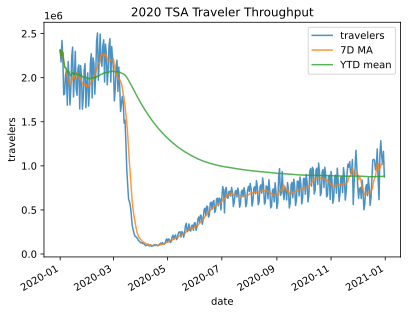

In [54]:
_ = tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)

Other types of windows:
- [exponentially weighted moving](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html): use the `ewm()` method
- [custom](https://pandas.pydata.org/docs/user_guide/window.html#window-custom-rolling-window): create a subclass of `pandas.api.indexers.BaseIndexer` or use a pre-built one in `pandas.api.indexers`

### [Exercise 2.5](./workbook.ipynb#Exercise-2.5)

##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [55]:
# Complete this exercise in the workbook.ipynb file
# Click on `Exercise 2.5` above to open the workbook.ipynb file

## Up Next: [Data Visualization](./3-data_visualization.ipynb)